# NetworkX Introduction - Lab

## Introduction

In this lab, you'll practice some of the introductory skills for creating graphs using the NetworkX library introduced in the previous lesson. To do this, you'll create a graph to visualize users and businesses from yelp reviews. 

## Objectives

In this lab you will: 

- Create basic network graphs with networkx 
- Add nodes and edges to networkx graphs 
- Visualize network graphs with networkx 

## Import the Data

To start, import the data stored in the file `'Yelp_reviews.csv'`. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Yelp_reviews.csv')
df.sample(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
8,jJhNOhuGpIsJX5SEUFFWYQ,2008-08-04,xTNGA-ZJ8oYS0zA5_dla7g,3,"On my way to the Airport, I decided to stop at...",review,JffajLV-Dnn-eGYgdXDxFg,1,1,1
60,7SO_rX1F6rQEl-5s3wZxgQ,2012-04-21,MdcOO0halc4Z8S4iCUQgVw,5,"Delicious salad, pizza, and wine. We got the P...",review,bBS2Qsf--DYRXbYe5q4CcQ,1,1,0


## Creating a Graph

Now, create an initial graph!

In [3]:
import networkx as nx
G = nx.Graph()

## Adding Nodes 

Create a node for each user and each business in the dataset. Networks with multiple node types like this are called **bimodal networks**.

Optionally, go further by creating a list of colors for when you visualize the graph. If you do this, append the color "green" to your color list every time you add a user node and append the color "blue" to your color list every time you add a business node.

In [4]:
names = {}
node_color = []
for n, person in enumerate(df.user_id.unique()):
    name = 'User{}'.format(n)
    names[person] = name
    G.add_node(name)
    node_color.append('green')
for n, biz in enumerate(df.business_id.unique()):
    name = 'Business{}'.format(n)
    names[biz] = name
    G.add_node(name)
    node_color.append('blue')  

## Adding Edges

Next, iterate through the dataset and create an edge between users and the businesses they have reviewed.

In [5]:
for row in df.index:
    user = df['user_id'][row]
    u_name = names[user]
    biz = df['business_id'][row]
    b_name = names[biz]
    G.add_edge(u_name, b_name)

## Visualizing the Graph

Finally, create a visualization of your network. If you chose to color your nodes, pass the list of colors through the optional `node_color` parameter.

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


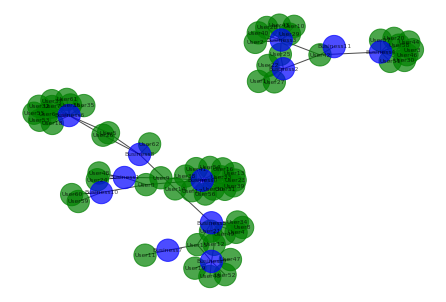

In [6]:
%matplotlib inline
nx.draw(G, with_labels=True, alpha=0.7, font_size=6, node_size=500, node_color=node_color)

## Summary

Nice work! In this lab you created an initial network to visualize a bimodal network of businesses and yelp reviewers!